# @Zalando : Fashion-MNIST dataset
**This image classification project is a personal endeavor undertaken to grasp the nuances of machine learning algorithms through hands-on experience.* 
<br>
<br>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#import">Importing packages</a></li>
<li><a href="#load">Loading data</a></li>
<li><a href="#train">Train model</a></li>
<li><a href="#evaluate">Model evaluation</a></li>
<li><a href="#test">Test predictions</a></li>   
<li><a href="#confusion">Confusion matrix</a></li>
<li><a href="#accuracy">Class-wise accuracy</a></li>

<a id='intro'></a>
## Introduction

The Fashion MNIST dataset stands as a substantial and freely accessible repository of fashion-centric images, frequently harnessed for training and assessing diverse machine learning systems. Engineered as a successor to the original MNIST database, Fashion-MNIST was strategically crafted to substitute its predecessor in order to set a benchmark for machine learning algorithms. This choice was guided by its adherence to identical image dimensions, data structure, as well as training and testing distribution. 

The dataset encompasses a grand total of 70,000 grayscale images, each occupying a 28x28 pixel canvas, representing a spectrum of fashion items sourced from Zalando's array of articles. Impressively, this collection accounts for 10 distinct fashion categories, with each category accommodating a wealth of 7,000 images. Notably, the dataset delineates its resource pool into two subsets: a training set brimming with 60,000 images and a test set housing an additional 10,000 images.

Fashion-MNIST has attained integral status within the standard arsenal of machine learning libraries. This dataset effectively serves as a dynamic platform, enabling the comprehensive exploration of machine learning algorithms by employing the realm of fashion images as its backdrop. Central to this venture is the profound pursuit of comprehending the intricacies associated with training and evaluating models, thereby crystallizing the quintessential exercise of image classification.

<a id='import'></a>
## Importing packages

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

<a id='load'></a>
## Loading data

In [3]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [4]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

<a id='train'></a>
## Train model

In [6]:
# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 3ms/step - loss: 0.5141 - accuracy: 0.8206 - val_loss: 0.4135 - val_accuracy: 0.8553
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3904 - accuracy: 0.8594 - val_loss: 0.4026 - val_accuracy: 0.8570
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3474 - accuracy: 0.8746 - val_loss: 0.3583 - val_accuracy: 0.8691
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3225 - accuracy: 0.8826 - val_loss: 0.3594 - val_accuracy: 0.8717
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3026 - accuracy: 0.8881 - val_loss: 0.3410 - val_accuracy: 0.8783


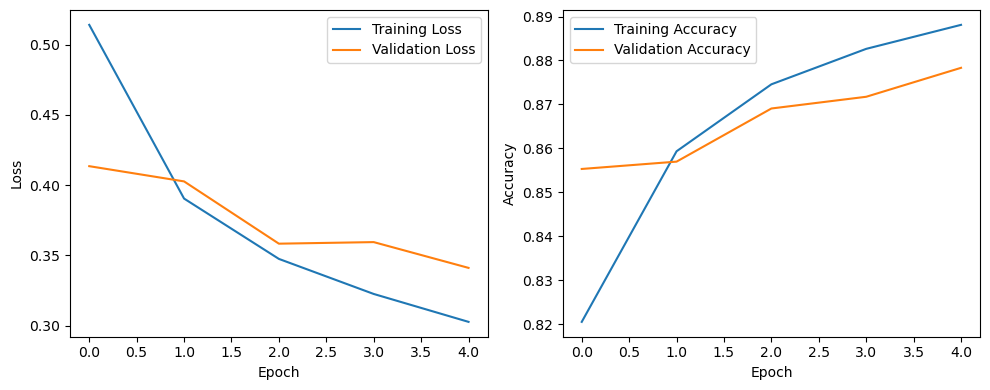

In [7]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

<a id='evaluate'></a>
## Model evaluation

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3653 - accuracy: 0.8704
Test accuracy: 0.8704000115394592


<a id='test'></a>
## Test predictions

1/1 [==============================] - 0s 18ms/step


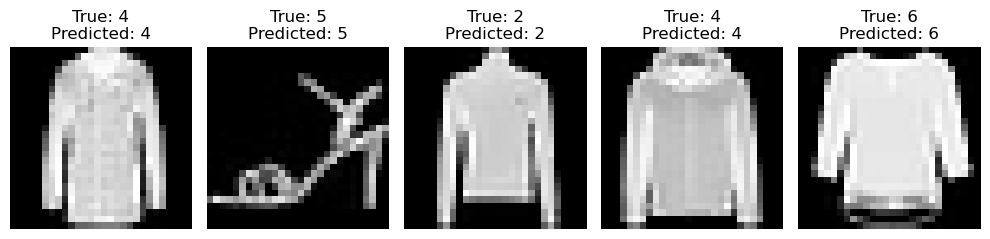

In [16]:
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"True: {sample_labels[i]}\nPredicted: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 14ms/step


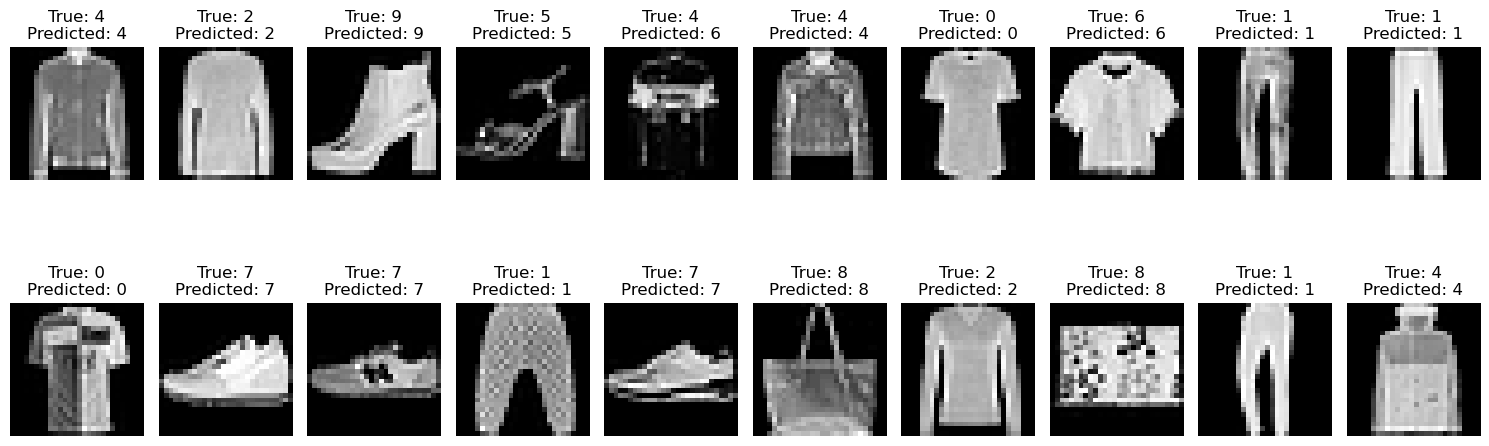

In [23]:
# Make sample predictions for more test samples
num_samples = 20
sample_indices = np.random.choice(x_test.shape[0], num_samples, replace=False)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(15, 6))
for i in range(num_samples):
    plt.subplot(2, num_samples // 2, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"True: {sample_labels[i]}\nPredicted: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

<a id='confusion'></a>
## Confusion matrix

313/313 [==============================] - 0s 1ms/step


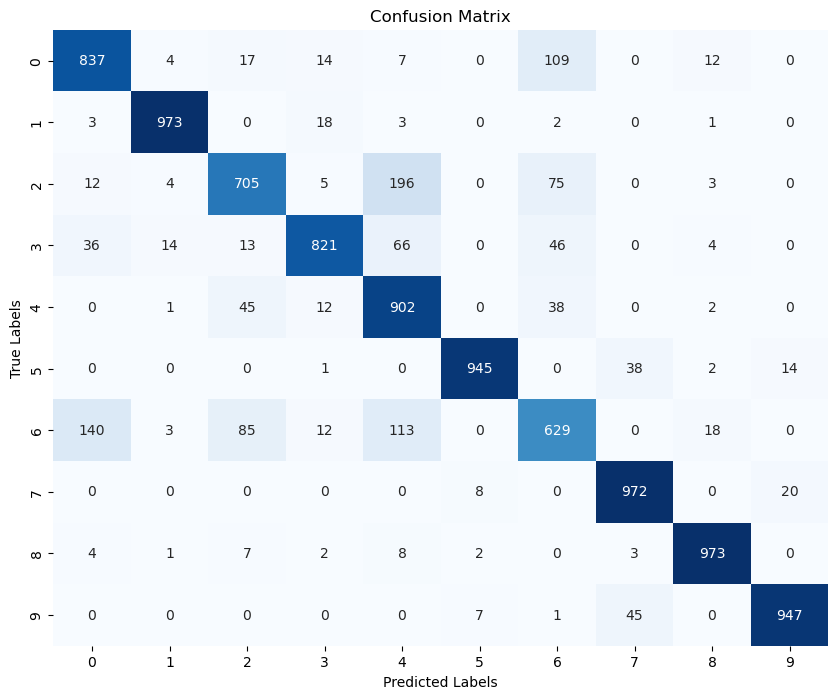

In [18]:
# Confusion Matrix
# Get overall test predictions
all_predictions = model.predict(x_test)
all_predicted_labels = np.argmax(all_predictions, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, all_predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<a id='accuracy'></a>
## Class-wise accuracy

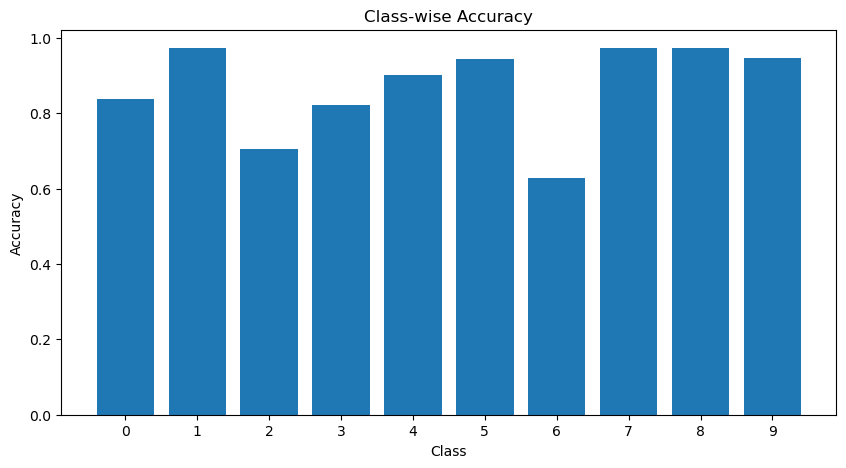

In [19]:
# Class-wise Accuracy
class_correct = np.zeros(10)
class_total = np.zeros(10)

for i in range(len(y_test)):
    class_total[y_test[i]] += 1
    if all_predicted_labels[i] == y_test[i]:
        class_correct[y_test[i]] += 1

class_accuracy = class_correct / class_total

plt.figure(figsize=(10, 5))
plt.bar(range(10), class_accuracy, tick_label=range(10))
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.show()